# 0. Imports libraries

In [1]:
#Essentials
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
from pickle import dump
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import accuracy_score

#Model
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

#Extras
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

---

---

# 1. Problem statement and data collection

## 1.1 Description of the problem

This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to predict, based on diagnostic measures, whether or not a patient has diabetes.

## 1.2 Data collection

In [2]:
path = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

df_download = pd.read_csv(path)
df_download.to_csv("../data/raw/diabetes.csv", index=False)

df = pd.read_csv("../data/raw/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1.3 Understanding the features

In [3]:
#Columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In this dataset, you will find the following variables:

- ``Pregnancies`` -> Number of pregnancies of the patient (numeric)
- ``Glucose`` -> Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
- ``BloodPressure`` ->Diastolic blood pressure (measured in mm Hg) (numeric)
- ``SkinThickness`` -> Triceps skin fold thickness (measured in mm) (numeric)
- ``Insulin`` -> 2-hour serum insulin (measured in mu U/ml) (numeric)
- ``BMI`` -> Body mass index (numeric)
- ``DiabetesPedigreeFunction`` -> Diabetes Pedigree Function (numeric)
- ``Age`` -> Age of patient (numeric)
- ``Outcome`` -> Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)

## 1.4 Data exploration

In [4]:
print(f'Our dataframe contains {len(df)} rows and it has {df.shape[1]} features.')

Our dataframe contains 768 rows and it has 9 features.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

***Conclusions:***
- We don't have categorical variables
- We don't have NaN values
- We have 9 numerical variables

## 1.5 Eliminating irrelevant information

For this dataset, we will keep all features, as we believe each one is crucial for predicting the target

---

---

# 2. Univariated Analysis

## 2.1 Dividing out dataset into categorical and numerical

In [8]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [9]:
num = ["int64", "float64"]
cat = ["O"]

#Nuemrical df
df_num = df.select_dtypes(num)
#Categorical df
df_cat = df.select_dtypes(cat)

In [10]:
df_num.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [11]:
df_cat.head(3)

""
0
1
2


## 2.2 Categorical variable analysis

***Conclusions:***

Since our dataset contains only numerical variables, categorical analysis is not applicable.

## 2.3 Numerical variable analysis

In [12]:
df_num.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


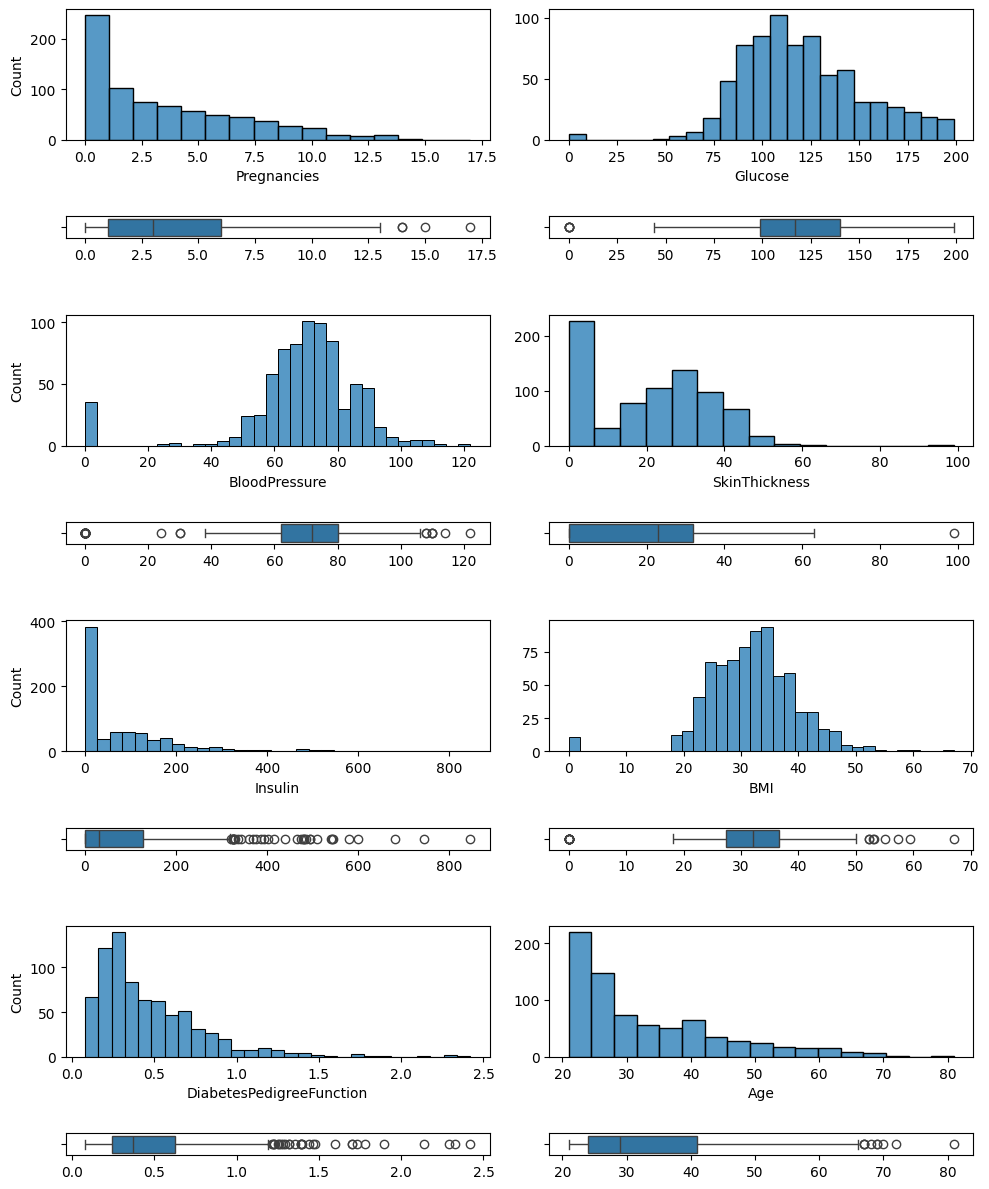

In [13]:
fig, ax = plt.subplots(8, 2, figsize=(10, 12), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1]})

# Charts first row 
sns.histplot(ax = ax[0,0], data = df_num, x='Pregnancies')
sns.boxplot(ax = ax[1,0], data = df_num, x='Pregnancies').set(xlabel = None)
sns.histplot(ax = ax[0,1], data = df_num, x='Glucose').set(ylabel = None)
sns.boxplot(ax = ax[1,1], data = df_num, x='Glucose').set(xlabel = None)

# Charts second row 
sns.histplot(ax = ax[2,0], data = df_num, x='BloodPressure')
sns.boxplot(ax = ax[3,0], data = df_num, x='BloodPressure').set(xlabel = None)
sns.histplot(ax = ax[2,1], data = df_num, x='SkinThickness').set(ylabel = None)
sns.boxplot(ax = ax[3,1], data = df_num, x='SkinThickness').set(xlabel = None)

# Charts third row
sns.histplot(ax = ax[4,0], data = df_num, x='Insulin')
sns.boxplot(ax = ax[5,0], data = df_num, x='Insulin').set(xlabel = None)
sns.histplot(ax = ax[4,1], data = df_num, x='BMI').set(ylabel = None)
sns.boxplot(ax = ax[5,1], data = df_num, x='BMI').set(xlabel = None)

#
sns.histplot(ax = ax[6,0], data = df_num, x='DiabetesPedigreeFunction')
sns.boxplot(ax = ax[7,0], data = df_num, x='DiabetesPedigreeFunction').set(xlabel = None)
sns.histplot(ax = ax[6,1], data = df_num, x='Age').set(ylabel = None)
sns.boxplot(ax = ax[7,1], data = df_num, x='Age').set(xlabel = None)


plt.tight_layout()
fig.subplots_adjust(hspace=1)
plt.savefig("num_analysis.png")
plt.show()

***Conclusions:***

- **1. Pregnancies (Number of pregnancies):**
    - Distribution: Skewed to the left, with most values in the range of 0-5. A few cases with high values (>10) appear as outliers.
    - Analysis:
        -Higher values could indicate unusual cases (individuals with many pregnancies) that should be reviewed based on the study's context.
        -This variable might be important for predictive modeling, as it could influence health outcomes.
- **2. Glucose (Blood glucose levels):**
    -Distribution: Close to a normal distribution, centered around 100-150, but with some outliers at higher values.
    -Analysis:
        -Most individuals appear to have normal glucose levels, while higher values may correspond to individuals with diabetes or prediabetes.
        -Glucose is likely a critical predictor for health-related conditions, particularly diabetes.
- **3. BloodPressure (Blood pressure):**
    - Distribution: Roughly symmetric, centered around 70-80, with a few outliers at higher values.
    - Analysis:
        -Values within the central range indicate normal blood pressure levels.
        -High outliers may be indicative of hypertension, which could be significant for predictive models.
- **4. SkinThickness (Skinfold thickness):**
    - Distribution: Skewed to the left, with values concentrated in the range of 0-50. Several outliers are present.
    - Analysis:
        - Very low values (close to 0) might represent missing data encoded as zeros.
        - Skin thickness is related to subcutaneous fat and could be an important variable for assessing metabolic risks.
- **5. Insulin (Insulin levels):**
    - Distribution: Heavily skewed to the left, with values concentrated in the range of 0-100, but many outliers above 300.
    - Analysis:
        - Low values may represent fasting insulin levels, while higher values could indicate insulin resistance.
        - The wide variability might affect modeling if not handled properly.
- **6. BMI (Body Mass Index):**
    - Distribution: Relatively normal, centered around 30, with some outliers at higher values (>50).
    - Analysis:
        - A BMI around 30 suggests the population tends towards being overweight or obese.
        - Extreme values may indicate morbid obesity, which could be relevant for predicting certain health conditions.
- **7. DiabetesPedigreeFunction:**
    - Distribution: Skewed to the right, with values mostly between 0-1 but some high outliers.
    - Analysis:
        - This metric reflects family history of diabetes. High values may indicate a significant genetic predisposition.
        - Extreme values might have a strong influence on models if not managed.
- **8. Age (Age):**
    - Distribution: Skewed to the right, with most values in the range of 20-50. A few outliers exceed 70.
    - Analysis:
        -The population appears to be predominantly young or middle-aged.
        -Higher values (outliers) could represent older individuals at greater risk of diabetes or related complications.

***General Conclusion:***

The analysis shows that some variables have outliers and skewed distributions (e.g., Insulin, SkinThickness), while others are more controlled (e.g., Glucose, BMI)

## 2.4 Multivariate analysis

### 2.4.1 Analysis Categorical - Categorical

***Conclusions:***

Since our dataset contains only numerical variables, categorical analysis is not applicable.

### 2.4.2 Encoding Categorical Values and saving in JSON files

In [14]:
df_enc = df.copy()

In [15]:
# Creating encoders for categorical features and saving them as JSON files. All files prefixed with 'enc'
# contain the encoding dictionaries for each categorical feature.
for column in df_cat.columns:
    unique_values = list(df_cat[column].unique())
    globals()[f"{column}_enc"] = dict(zip(unique_values, range(len(unique_values))))

    json.dump(globals()[f"{column}_enc"], open(f'../data/interim/enc_{column}.json', 'w'))

In [16]:
# Replacing the values in our categorical features to our encoded values (numerical)
for column in df_cat.columns:
    df_enc[column] = df_enc[column].map(json.load(open(f'../data/interim/enc_{column}.json')))

In [17]:
df_enc.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.4.3 Analysis Numerical - Numerical

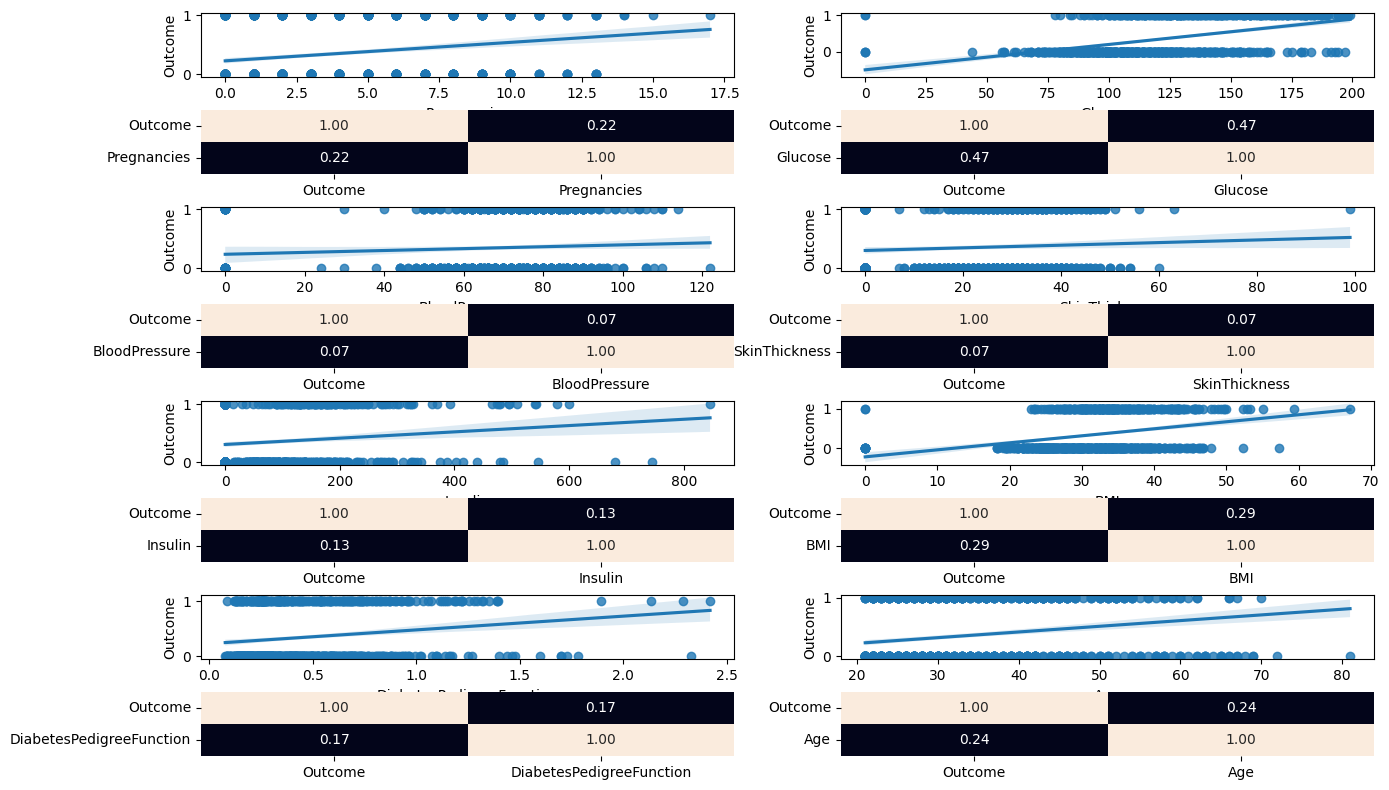

In [18]:
fig, axis = plt.subplots(8, 2, figsize = (14, 8))

sns.regplot(ax = axis[0, 0], data = df_enc, x = "Pregnancies", y = "Outcome")
sns.heatmap(df_enc[["Outcome", "Pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df_enc, x = "Glucose", y = "Outcome")
sns.heatmap(df_enc[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[2, 0], data = df_enc, x = "BloodPressure", y = "Outcome")
sns.heatmap(df_enc[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = df_enc, x = "SkinThickness", y = "Outcome")
sns.heatmap(df_enc[["Outcome", "SkinThickness"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(ax = axis[4, 0], data = df_enc, x = "Insulin", y = "Outcome")
sns.heatmap(df_enc[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0], cbar = False)

sns.regplot(ax = axis[4, 1], data = df_enc, x = "BMI", y = "Outcome")
sns.heatmap(df_enc[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1], cbar = False)

sns.regplot(ax = axis[6, 0], data = df_enc, x = "DiabetesPedigreeFunction", y = "Outcome")
sns.heatmap(df_enc[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 0], cbar = False)

sns.regplot(ax = axis[6, 1], data = df_enc, x = "Age", y = "Outcome")
sns.heatmap(df_enc[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 1], cbar = False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

### 2.4.4 Numerical - Categorical analysis (Correlational Analysis)

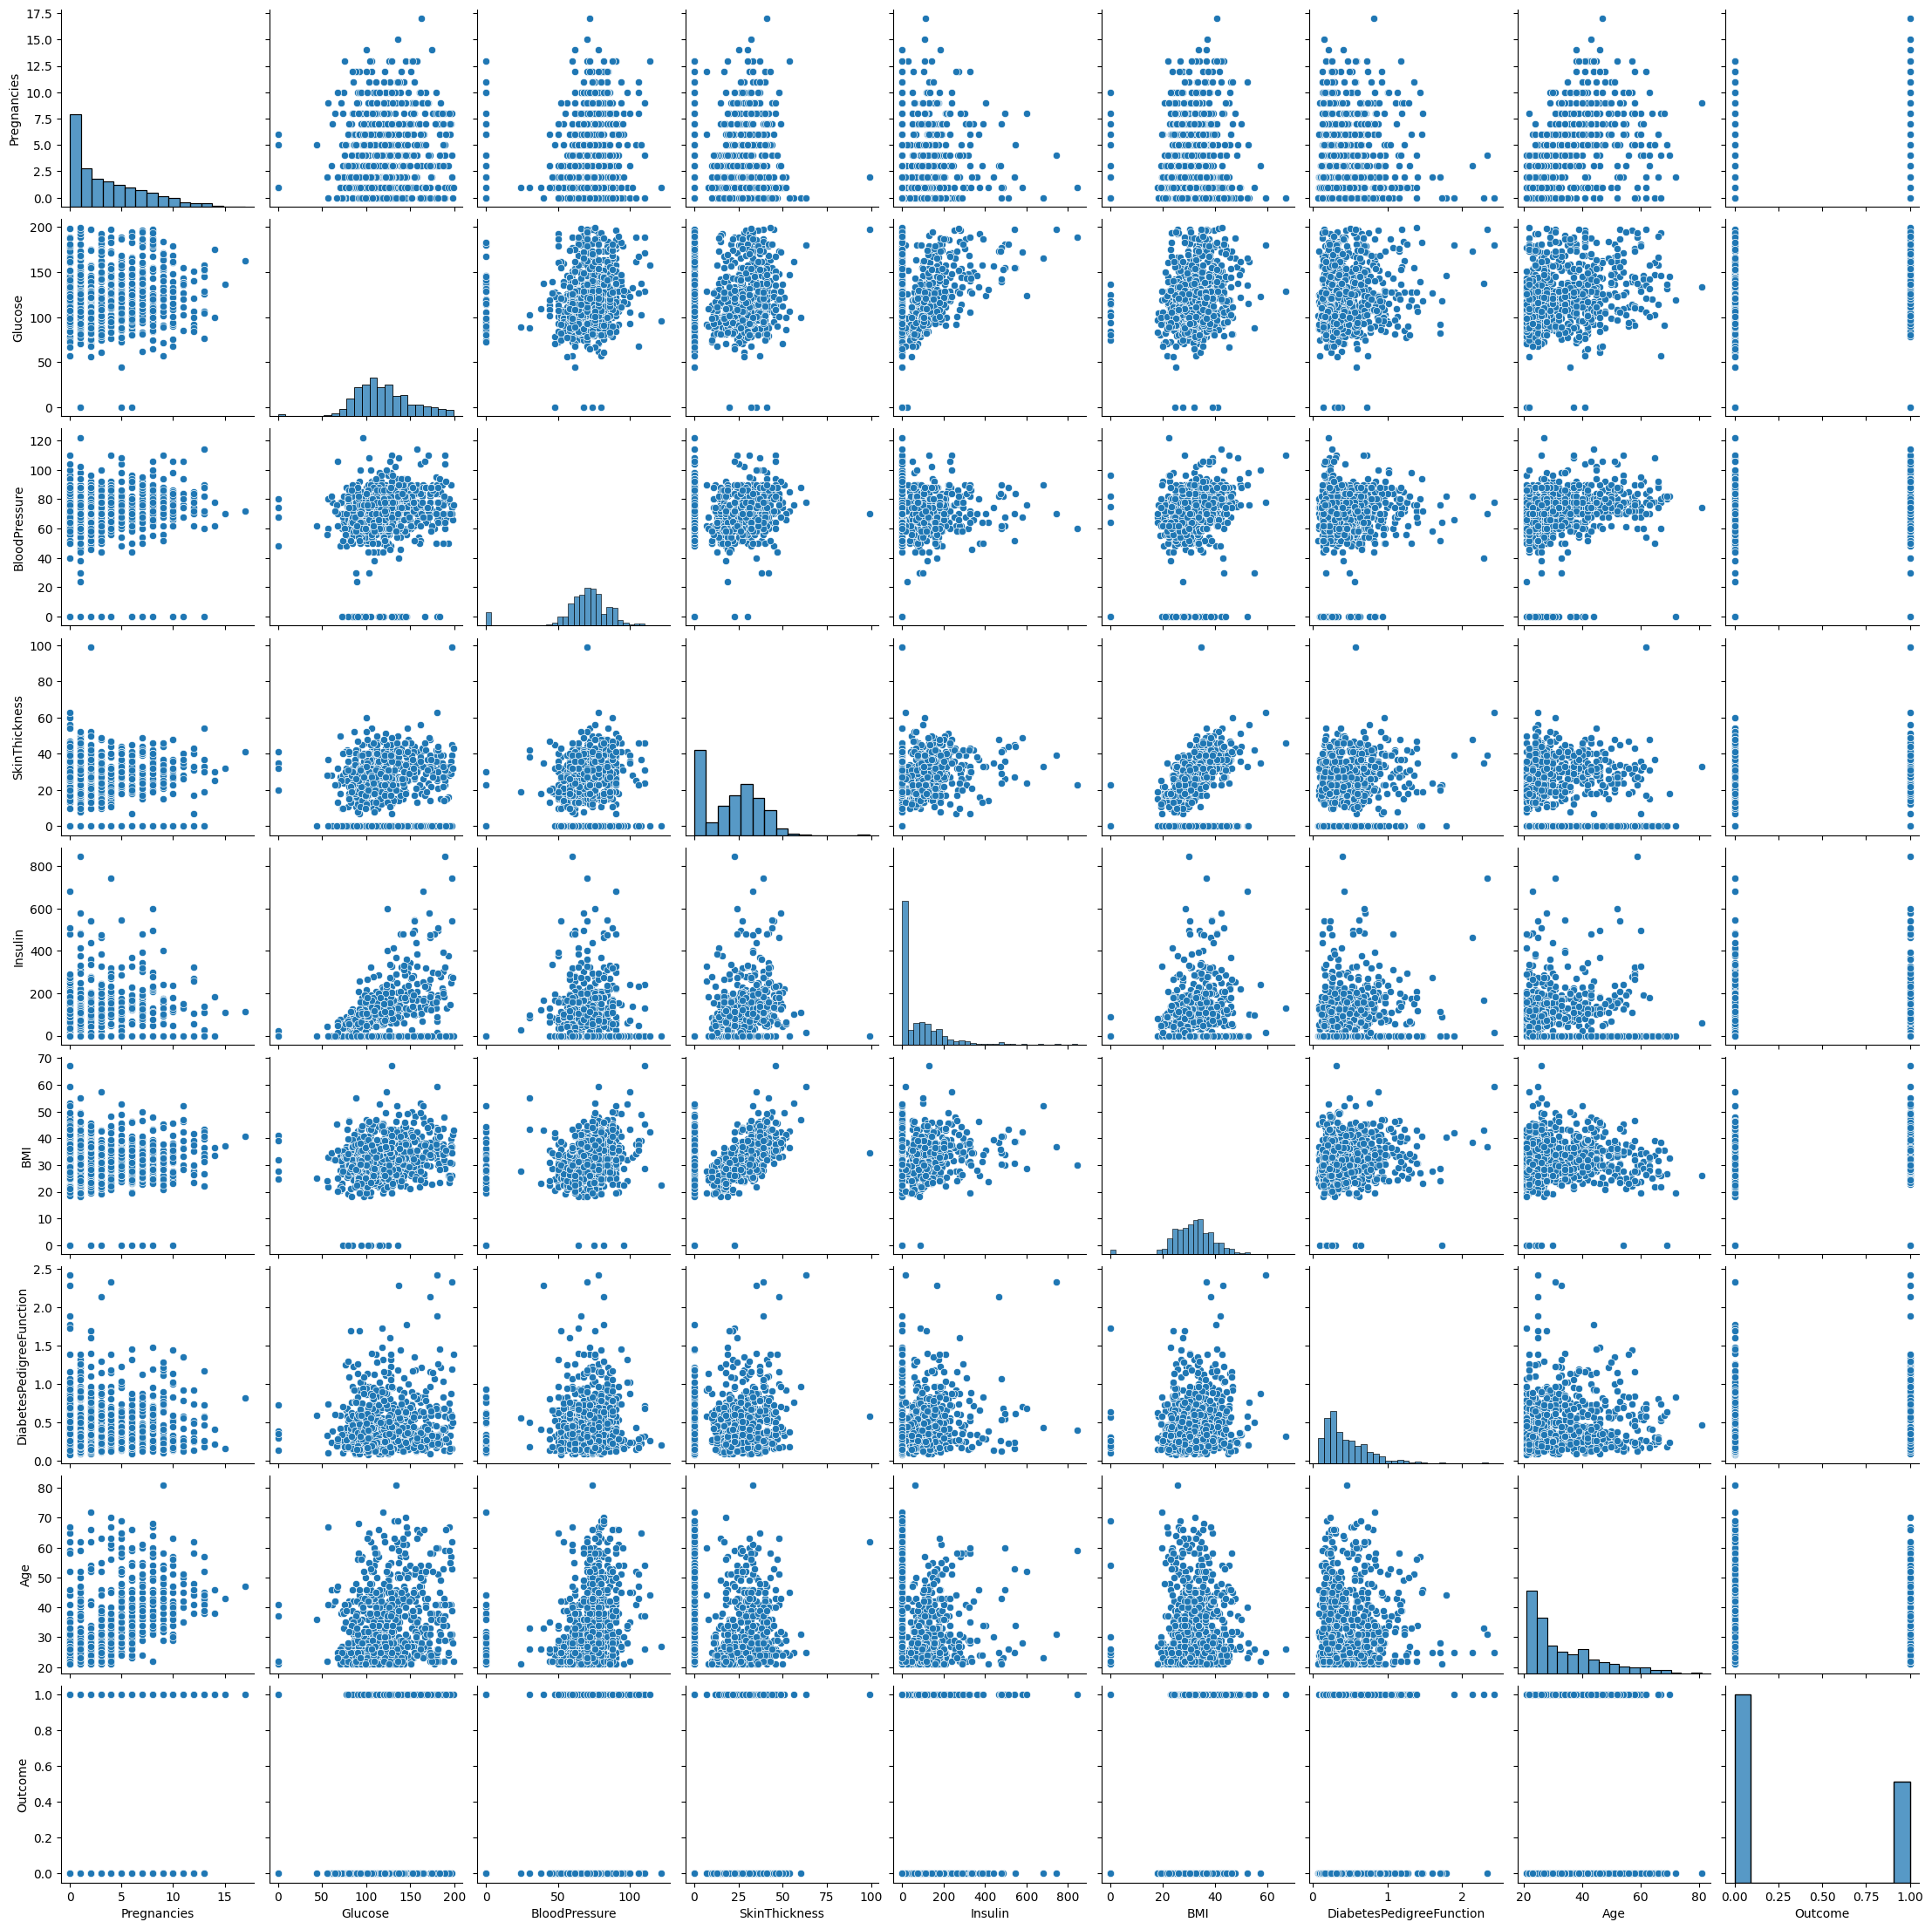

In [19]:
sns.pairplot(data=df_enc)
plt.savefig("Num_cat_corr.png")
plt.show()

***Conclusion:***

1. **Strong correlation between BMI and SkinThickness**:
   - Higher BMI values tend to align with increased SkinThickness, suggesting a direct relationship with body fat distribution.

2. **Glucose shows a clear split by Outcome**:
   - Individuals with higher Glucose levels are more likely to belong to the positive Outcome group (likely indicating diabetes).

3. **Weak relationships among most variables**:
   - Apart from a few clear correlations, many features show weak or no significant linear relationships.

4. **Insulin has high variability**:
   - Insulin levels are highly scattered with extreme outliers, indicating possible noise or variability in data collection.

5. **Age has minimal impact on other variables**:
   - Age does not show strong correlations with key features like Glucose, BMI, or Insulin, implying it might play a lesser role in determining the Outcome directly.


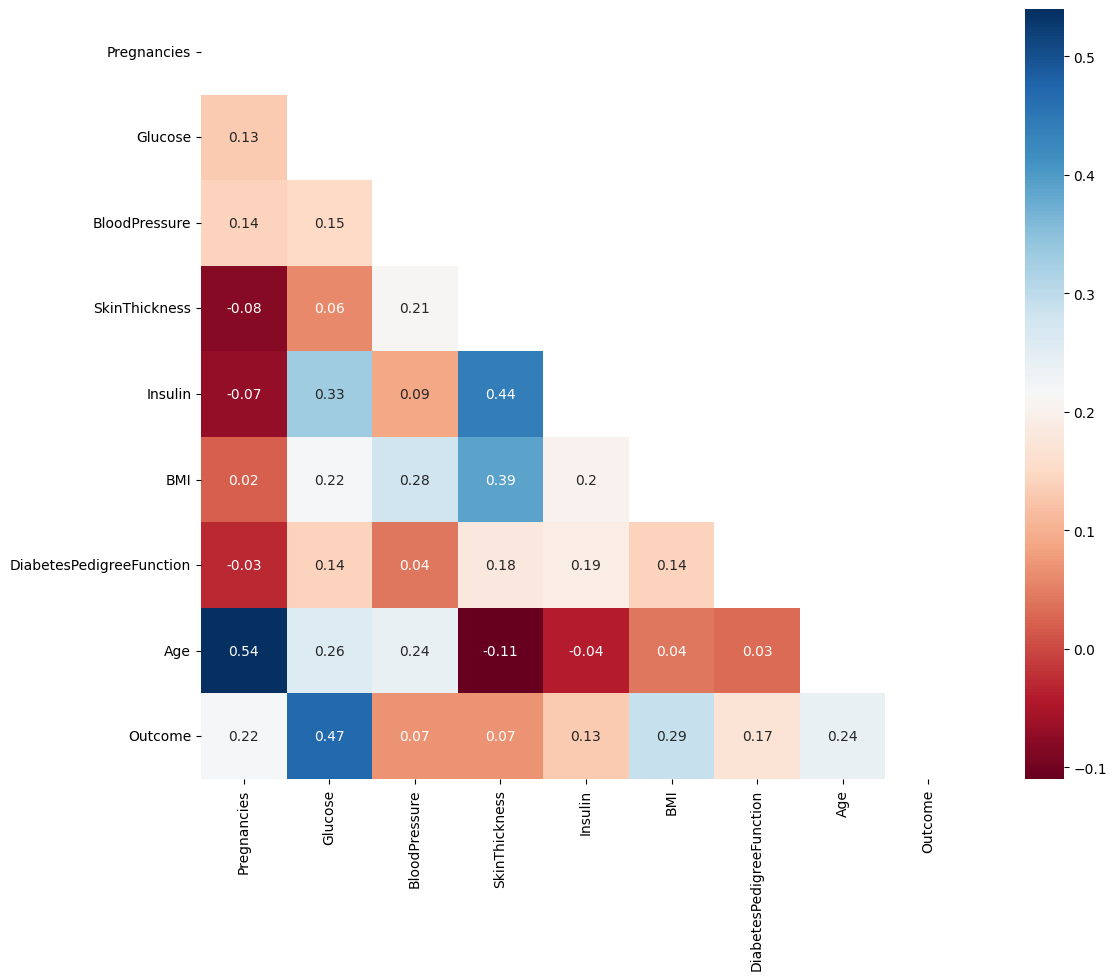

In [20]:
plt.figure(figsize=(14,10))
sns.heatmap(data=df_enc.corr().round(2), annot=True, square= True, cmap="RdBu", mask=np.triu(df_enc.corr()))
plt.savefig("heat_map_corr.png")
plt.show()

***Conclusion:***

1. **Strong correlation between Glucose and Outcome**:
   - Glucose shows the highest correlation with Outcome (0.47), indicating its importance in predicting the target variable.

2. **BMI is moderately correlated with Outcome**:
   - BMI has a positive correlation (0.29) with Outcome, suggesting a link between body weight and the target variable.

3. **Insulin and BMI are strongly related**:
   - Insulin and BMI exhibit a strong positive correlation (0.44), indicating that higher BMI often aligns with higher Insulin levels.

4. **Pregnancies positively correlates with Age**:
   - Pregnancies and Age have a strong positive correlation (0.54), reflecting that older individuals tend to have more pregnancies.

5. **SkinThickness shows weak correlations**:
   - SkinThickness has weak relationships with both Outcome (0.07) and other features, suggesting it might not be a key predictor.


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

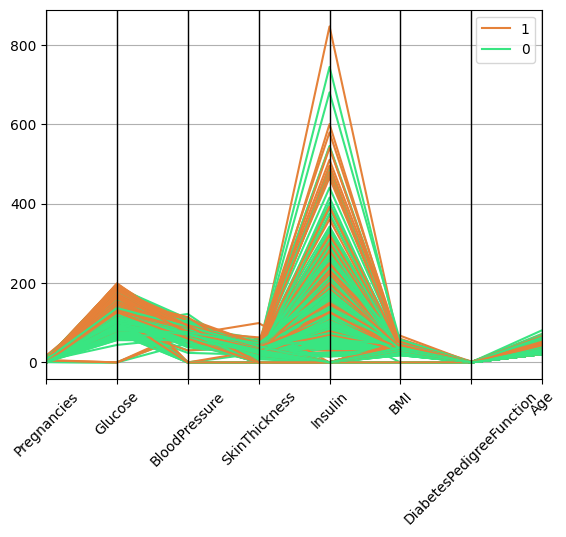

In [21]:
total_data = df_enc
total_data["Outcome"] = df_enc["Outcome"]

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))
plt.xticks(rotation=45)

***Conclusions:***

1. **Glucose significantly differentiates outcomes**:
   - Individuals with higher Glucose levels are more likely to have an outcome of 1, indicating its strong importance in predicting the target variable.

2. **Insulin shows extreme variance**:
   - Insulin values vary greatly across both outcomes, with high peaks that may indicate noise or outliers affecting the analysis.

3. **BMI displays moderate separation**:
   - BMI values for outcome 1 are generally higher compared to outcome 0, aligning with its known relevance to health conditions.

4. **BloodPressure and SkinThickness overlap**:
   - Both features show significant overlap between the two outcome groups, suggesting they might have limited predictive power on their own.

5. **Age contributes to outcome patterns**:
   - Higher Age values appear more common for outcome 1, indicating a potential correlation with the target variable.

---

---

# 3. Feature Engineering

## 3.1 New feature inference

No additional features will be generated for this analysis since the existing variables are considered adequate to effectively capture the relationships and insights required for predicting medical conditions

## 3.2 Outlier analysis

In [22]:

df_enc.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


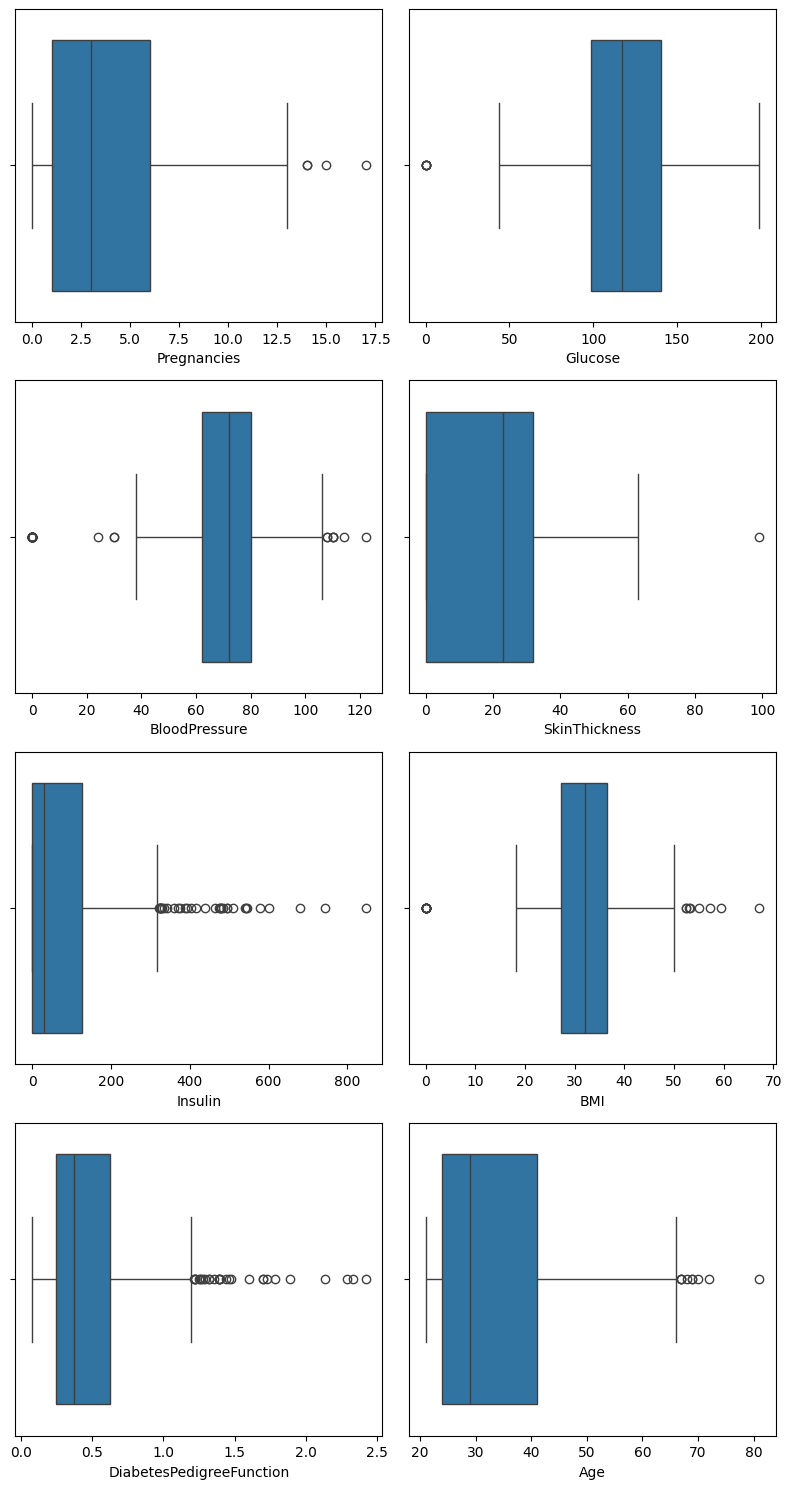

In [23]:
continuos_f = list(df_enc)

fig, ax = plt.subplots(4,2, figsize=(8, 15))

sns.boxplot(ax = ax[0,0], data = df_enc, x="Pregnancies")
sns.boxplot(ax = ax[0,1], data = df_enc, x="Glucose")
sns.boxplot(ax = ax[1,0], data = df_enc, x="BloodPressure")
sns.boxplot(ax = ax[1,1], data = df_enc, x="SkinThickness")
sns.boxplot(ax = ax[2,0], data = df_enc, x="Insulin")
sns.boxplot(ax = ax[2,1], data = df_enc, x="BMI")
sns.boxplot(ax = ax[3,0], data = df_enc, x="DiabetesPedigreeFunction")
sns.boxplot(ax = ax[3,1], data = df_enc, x="Age")


plt.tight_layout()
plt.show()

In [24]:
df_enc_no = df_enc.copy()

In [25]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [26]:
f_outliers_with_neg = []
f_outliers_no_neg = []

for each in continuos_f:
    if df_enc[each].min() < 0:
        f_outliers_with_neg.append(each)
    f_outliers_no_neg.append(each)

for feature in f_outliers_with_neg:
    df_enc_no[feature] = remove_outliers(df_enc_no[feature], feature)

for feature in f_outliers_no_neg:
    df_enc_no[feature] = remove_outliers(df_enc_no[feature], feature, allow_neg=False)

## 3.3 Check missing values

In [27]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

## 3.4 Split train/test of both Dataframe

In [28]:
def split(target, df, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [29]:
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('Outcome', df_enc)
X_train_without_outliers, X_test_without_outliers, _, _ = split('Outcome', df_enc_no)

X_train_with_outliers.to_csv('../data/processed/X_train_with_outliers.csv', index=False)
X_test_with_outliers.to_csv('../data/processed/X_test_with_outliers.csv', index=False)
X_train_without_outliers.to_csv('../data/processed/X_train_without_outliers.csv', index=False)
X_test_without_outliers.to_csv('../data/processed/X_test_without_outliers.csv', index=False)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

In [30]:
X_test_with_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
236,7,181,84,21,192,35.9,0.586,51
395,2,127,58,24,275,27.7,1.600,25
36,11,138,76,0,0,33.2,0.420,35
210,2,81,60,22,0,27.7,0.290,25
483,0,84,82,31,125,38.2,0.233,23


## 3.5 Normalization

In [31]:
def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, open(f'../data/processed/normalized_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [32]:
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

## 3.6 Min-Max Scaling

In [33]:
def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    
    dump(scaler, open(f'../data/processed/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [34]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

## 3.7 Feature selection

### 3.7.1 Kselection

In [35]:
def kselection(X_train, X_test, y_train, k, reference: str):
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])

    dump(selection_model, open(f'../data/processed/selection_model_{reference}.sav', 'wb'))

    return X_train_sel, X_test_sel

In [36]:
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 'all', 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 'all', 'without_outliers')

### 3.7.2 Applying the columns filter (kselection) to the normalized and minmax scaled data frames

In [37]:
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

3.7.2 Saving the CSV files

In [38]:
dfs_train = {
    'X_train_with_outliers_sel': X_train_with_outliers_sel,
    'X_train_without_outliers_sel': X_train_without_outliers_sel,
    'X_train_with_outliers_norm_sel': X_train_with_outliers_norm_sel,
    'X_train_without_outliers_norm_sel': X_train_without_outliers_norm_sel,
    'X_train_with_outliers_minmax_sel': X_train_with_outliers_minmax_sel,
    'X_train_without_outliers_minmax_sel': X_train_without_outliers_minmax_sel 
}

dfs_test = {
    'X_test_with_outliers_sel': X_test_with_outliers_sel,
    'X_test_without_outliers_sel': X_test_without_outliers_sel,
    'X_test_with_outliers_norm_sel': X_test_with_outliers_norm_sel,
    'X_test_without_outliers_norm_sel': X_test_without_outliers_norm_sel,
    'X_test_with_outliers_minmax_sel': X_test_with_outliers_minmax_sel,
    'X_test_without_outliers_minmax_sel': X_test_without_outliers_minmax_sel    
}

for name, df in dfs_train.items():
    df.to_csv(f"../data/processed/{name}.csv", index=False)

for name, df in dfs_test.items(): 
    df.to_csv(f'../data/processed/{name}.csv', index=False)

---

---

# 4. Machine Learning

In [39]:
train, test = [], []

for name, df in dfs_train.items():
    train.append(df)
for name, df in dfs_test.items():
    test.append(df)

## 4.1 Model Decision Tree

In [40]:
results = []

for index in range(len(train)):
    model = DecisionTreeClassifier(random_state=42)
    train_df = train[index]
    model.fit(train_df, y_train)
    y_test_pred = model.predict(test[index])

    results.append(
        {
            'index': index,
            'df_train': list(dfs_train.keys())[index],
            'Accuracy Score': round(accuracy_score(y_test, y_test_pred),4)         
        }
    )

results = sorted(results, key=lambda x: x['Accuracy Score'], reverse=True)
best_ind = results[0]['index']
best_df_train = results[0]['df_train']
results[0]

{'index': 0, 'df_train': 'X_train_with_outliers_sel', 'Accuracy Score': 0.7987}

In [41]:
print(f'Our best dataframe for our model is {best_df_train}, with an Accuracy Score of {results[0]["Accuracy Score"]}')

Our best dataframe for our model is X_train_with_outliers_sel, with an Accuracy Score of 0.7987


## 4.2 Optimization

### 4.2.1 Grid search

Find the best hyperparameters

In [42]:
hyperparams = {
    "splitter": ["best"],
    "max_depth": [15, 20, 25, 30, 35],
    "min_samples_split": [2, 3, 4, 5],
    "random_state": [42],
    "min_weight_fraction_leaf": [0.01, 0.015, 0.025, 0.05, 0.075, 0.1]
}

model = DecisionTreeClassifier()
model.fit(dfs_train.get(best_df_train), y_train)
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 3)
grid.fit(dfs_train.get(best_df_train), y_train)
print(f'The best hyperparameters are: {grid.best_params_}')

The best hyperparameters are: {'max_depth': 15, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.025, 'random_state': 42, 'splitter': 'best'}


Try the best hyperparameters

In [50]:
model_grid = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split=2, min_weight_fraction_leaf=0.025)
model_grid.fit(dfs_train.get(best_df_train), y_train)
y_pred = model_grid.predict(dfs_test.get(list(dfs_test)[best_ind]))
model_grid_accuracy = round(accuracy_score(y_test, y_pred),4)
print(f'The model accuracy with the hyperparameters is: {model_grid_accuracy*100}%, an increase of {round(model_grid_accuracy-(results[0]["Accuracy Score"]),4)*100}% vs the default model')

The model accuracy with the hyperparameters is: 78.57%, an increase of -1.3% vs the default model


In [52]:
tree_rules = export_text(model, feature_names = X_train_with_outliers_sel.columns)
print(tree_rules)

|--- Glucose <= 143.50
|   |--- BMI <= 26.95
|   |   |--- BMI <= 26.35
|   |   |   |--- Age <= 59.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.68
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.68
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.69
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.69
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Age >  59.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.34
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DiabetesPedigreeFunction >  0.34
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- SkinThickness <= 22.00
|   |   |   |   |--- class: 0
|   |   |   |--- SkinThickness >  22.00
|   |   |   |   |--- Pregnancies <= 2.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  2.00
|   |   |   |   |   |--- class: 1
|   |--- BMI >  26.95
|   |   |--- Glucose <= 107.50
|   |   |   |--- Dia

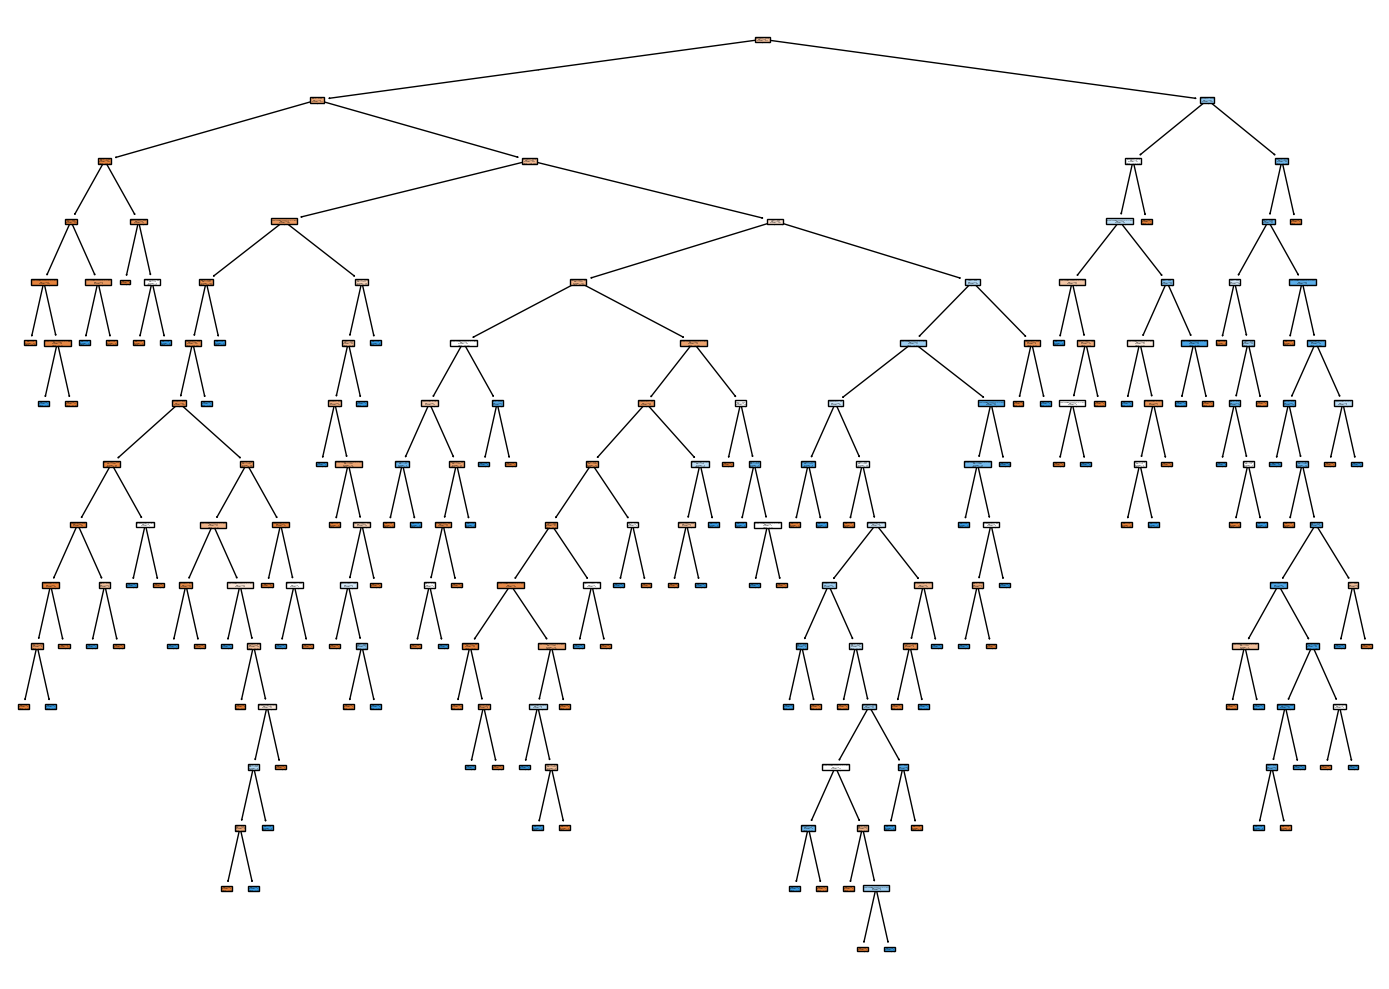

In [53]:
plt.figure(figsize=(14,10))

plot_tree(
    model, 
    feature_names = X_train_with_outliers_sel.columns, 
    filled = True
)

plt.tight_layout()
plt.savefig("decision_tree.png")
plt.show()